<h2 align="center">Multiple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [4]:
#from Kaggle
advertise = pd.read_csv('Advertising.csv')

In [5]:
#sales in thousands of units
#advertising in thousands of dollars 
advertise.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
#200 rows and 4 columns 
advertise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Relationship between Features and Response

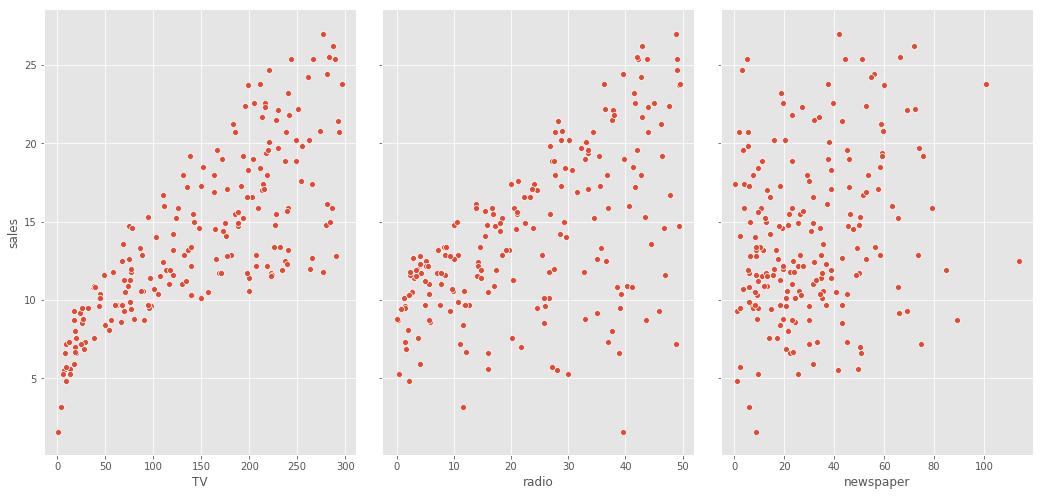

In [7]:
#three subplots using seaborn
sns.pairplot(advertise, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', 
             height=7, aspect=0.7)

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [8]:
from sklearn.linear_model import LinearRegression

X = advertise[['TV', 'radio', 'newspaper']]
y = advertise.sales

#fit data
#multiple linear regression will return the coefficients for each of the predictors
linear_m1 = LinearRegression()
linear_m1.fit(X,y)

#intercept
print(linear_m1.intercept_)
#coeffcients for each predictor
print(linear_m1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [9]:
#associate name of predictor with its respective coefficient
list(zip(['TV', 'radio', 'newspaper'], linear_m1.coef_))

[('TV', 0.045764645455397615),
 ('radio', 0.18853001691820456),
 ('newspaper', -0.0010374930424763272)]

Interpretation:
For an additional $1,000 spend on radio advertising, there will be an approximate increase in sales of aorund 188 units. 
(A similar interpretation applies to the other predictors by taking their respective coeffeicients into consideration.)

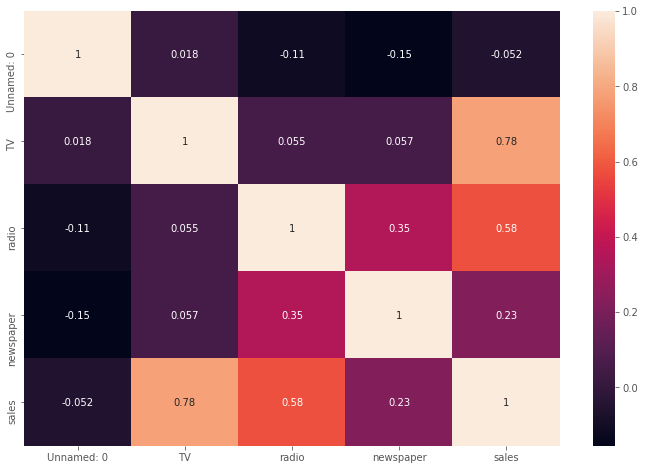

In [10]:
#let's take a closer at our predictors via a correlation matrix 
sns.heatmap(advertise.corr(), annot=True);

Interprettaion:
We can see that there is positive correlation between newspaper and radio advertising. This suggests that markets that spend more on newspaper advertising also spend more on radio advertising.  

### Task 5: Feature Selection

Which predictors, if any, are associated with the response? Feature selection will help us answer this question. Using feature selection can help us fit a model that exclusively includes variables associated with the response. 

In [12]:
from sklearn.metrics import r2_score

#fit second model with newspaper excluded
linear_m2 = LinearRegression().fit(X[['TV', 'radio']], y)

linear_m2_pred = linear_m2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, linear_m2_pred))

R^2:  0.8971942610828956


In [13]:
#fit third model with all predictors included
linear_m3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)

linear_m3_pred = linear_m3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, linear_m3_pred))

R^2:  0.8972106381789522


Interpretation:
R^2 is a common metric for model fit and it signifies the fraction of the variance explained in the response variable (sales) by the predictors (the advertising variables).

Here, both models achived a high R^2. But while the third model's (with all predictors included) R^2 is slightly higher than the second model (with newspaper excluded), the increase is small, and thus 'newspaper' can be dropped from the model as a predictor. In other words, the 'newspaper' predictor provides no real improvement to the model fit and its inclusion can lead to poor performance on testing samples, due to overfitting .

### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

RMSE calculates the difference between the actual value and the predicted value of the response variable. Then it takes the squareroot of the mean of the square of all the errors. RMSE severly penalizes larger errors. The lower the RMSE, the better the model.

RMSE has an advantage over MSE in that it is interpretable in the y units (i.e., the response variable). Furthermore, RMSE can be interpreted as the standard deviation of the unexplained variance 

Let us use train/test split with RMSE to see whether newspaper should be included in the model:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advertise[['TV', 'radio', 'newspaper']]

y = advertise.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#fit fourth model using training data
linear_m4 = LinearRegression().fit(X_train, y_train)

In [15]:
#predict sales on testing data
linear_m4_pred = linear_m4.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, linear_m4_pred)))

print("R^2: ", r2_score(y_test, linear_m4_pred))

RMSE:  1.404651423032895
R^2:  0.9156213613792232


In [16]:
#model 5: excludes 'newspaper'
X = advertise[['TV', 'radio']]

y = advertise.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#fit fifth  model using training data
linear_m5 = LinearRegression().fit(X_train, y_train)

#predict sales on testing data
linear_m5_pred = linear_m5.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, linear_m5_pred)))

print("R^2: ", r2_score(y_test, linear_m5_pred))

RMSE:  1.3879034699382886
R^2:  0.9176214942248908


Interpretation:
The R^2 value increased and the RMSE decreased in the 5th  model, where 'newspaper' is omitted from the model. This proves that removing 'newspaper' improves the model. 

In [38]:
#conda install -c districtdatalabs yellowbrick

In [21]:
import yellowbrick

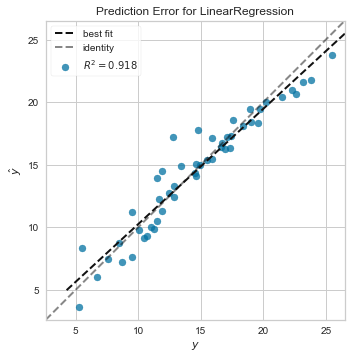

In [24]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

#fit model to our visualizer
visualizer = PredictionError(linear_m5).fit(X_train, y_train)

visualizer.score(X_test, y_test)

#similar to plt.show()
visualizer.poof();

Interpretation:

The identity line is the best case.
The best fit is our line. 

Notice that altough R^2 is high, there is still some unexplained variability that our model is unable to capture. This may be due to our data not being linear or the presenence of a synnergy/interaction effect (which we will explore in Task 7).

### Task 7: Interaction Effect (Synergy)

Thus far, our model assumes that the effect of increasing advertising spending in one medium (e.g., radio, TV) on sales is independent of the amount spend on the other medium. This may be incorrect.

It may be the case that increasing spending on radio advertisement also increases the effectiveness of TV advertising or vise versa. Thus increasing spending in one medium would increase the effectiveness of the other. This is called the synergy or interaction effect.

Why does it matter?
It may be the case that spending 100,000 on both mediums equally (50,000 each) increases sales more than allocating the 100,000 on one medium exclusively. 

Here we will include an interaction predictor, which is simply the product of the other two predictors. 

In [36]:
#add column for interaction effect
advertise['interaction'] = advertise['TV'] * advertise['radio']

#add interaction predictor to feature vector X
X = advertise[['TV', 'radio', 'interaction']]

y = advertise.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#fit fifth  model using training data
linear_m6 = LinearRegression().fit(X_train, y_train)

#predict sales on testing data
linear_m6_pred = linear_m6.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, linear_m6_pred)))

print("R^2: ", r2_score(y_test, linear_m6_pred))

RMSE:  0.7011871137164325
R^2:  0.9789736814681261


There is a considerable increase in R^2 and huge decrease in RMSE. Thus our model has significantly improved by including the interaction preictor.

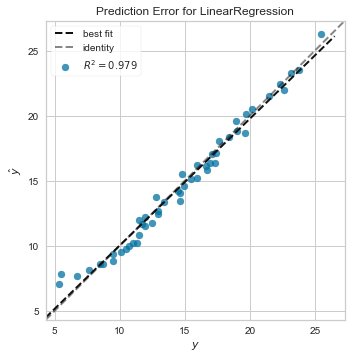

In [37]:
visualizer = PredictionError(linear_m6).fit(X_train, y_train)

visualizer.score(X_test, y_test)

#similar to plt.show()
visualizer.poof();

Our new model describes the data more accurately. In other words, the line of best fit, our line, is very close to the data points. This model explains over 97% of the variability in the data. 

Our interatction term also has a coeffcient. We can interpret this as the increase in the effectiveness of tv advertising for one unit increase in radio advertising, or vise versa.

Conclusion:
The model with the interaction effect is more accurate at explaining the data than the model that only contains main effects.

This is because the additive assumption did not apply with to the given data, hence the presence of the synnergy effect. 